**Title:** Analyzing Symptoms for Early Diabetes Detection


**Authors:** Angela Cheng, Crystal Diaz, Janet Pham, Laurand Osmeni


**Introduction**
*   Why was the project undertaken?
> Our team undertook this project to address the need for data science and visualization techniques in improving diabetes detection and prediction by leveraging data science and visualization techniques. According to  American Diabetes Association approximately 37.3 million Americans affected by diabetes, which accounts for 11.3% of the population, and around 1.9 million individuals living with type 1 diabetes, including about 244,000 children and adolescents, the significance of effective disease management cannot be overstated. By providing valuable insights through analytical methods and visualizations, our goal was to empower healthcare professionals to improve outcomes for individuals affected by diabetes.


*   What was the research question, the tested hypothesis or the purpose of the research?

  > How can data science and visualization techniques support the early detection and prediction of diabetes?

  > From the dataset and accompanying plots, potential hypotheses arise regarding factors that may contribute to an increased likelihood of diabetes. These hypotheses involve the influence of age, certain symptoms as polyuria and polydipsia, obesity, gender, and specific symptoms like visual blurring and delayed healing on the prevalence of diabetes.


**Selection of Data**
* What is the source of the dataset? Characteristics of data?
>  The dataset was obtained from the reputable UCI website, a reliable source for machine learning datasets. It serves the purpose of predicting the risk of early stage diabetes. The dataset contains 520 instances of newly diagnosed diabetic individuals, with 17 attributes describing diabetes related signs and symptoms. It is specifically designed for early stage diabetes risk prediction.

  > Dataset https://raw.githubusercontent.com/Jamham1020/CST383_Project/main/diabetes_data_upload.csv

  > Source: Early stage diabetes risk prediction dataset.. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5VG8H.


* Any munging or feature engineering?
> Yes, to prepare the dataset for analysis, we performed data cleaning and feature engineering. This involved handling missing values, removing duplicates, and fixing inconsistencies. We also created new features and transformed existing ones to better capture relevant information. These steps improved the quality and usefulness of the data for our analysis.


**Methods.**
* What materials/APIs/tools were used or who was included in answering the research question?

 >  Methods and materials we used for data analysis libraries were Pandas and NumPy, along with machine learning classification decission tree, for building and training predictive models. Visualization tools like Matplotlib and Seaborn were used to present the findings and visualize the data.

 > Collaborative platforms such as Slack, Colab, GitHub and Jupyter Notebook were employed to facilitate communication among team members and share code. Everyone on the team participated in answering the research question, providing input, suggestions, and making improvements to the project.

 > Also, we searched and looked at the valuable insights from healthcare professionals through the clinician professional website, https://diabetes.org. Their expertise helped us gain domain specific knowledge on aspects related to diabetes detection and management.

 > Source: Statistics About Diabetes | ADA. (n.d.). https://diabetes.org/about-us/statistics/about-diabetes

**Results**
* What answer was found to the research question; what did the study find? Was the tested hypothesis true? Any visualizations?
> Our study found that data science and visualization techniques effectively support the early detection and prediction of diabetes. Key factors such as age, gender, and symptoms like polyuria and polydipsia were identified as significant predictors of diabetes. Visualizations including bar plots, violin plots, scatter plots, and confusion matrices provided valuable insights into the distribution of diabetes cases and the performance of predictive models.

  > Yes, the tested hypothesis were true. The hypothesis that data science and visualization techniques can support the early detection and prediction of diabetes was supported by the study's findings.

  > The study utilized various visualizations, such as bar plots, violin plots, scatter plots, and confusion matrices, to enhance understanding of patterns, correlations, and predictive models in diabetes detection and prediction.

**Discussion**
* What might the answer imply and why does it matter? How does it fit in with what other researchers have found? What are the perspectives for future research? Survey about the tools investigated for this assignment.
> The implications of the findings suggest that age, gender, and specific symptoms such as polyuria and polydipsia play important roles in predicting the likelihood of developing diabetes. Understanding these factors can help healthcare professionals identify individuals at higher risk and implement preventive measures or early interventions.

 > The research on diabetes risk factors, age is a well established factor, with older individuals being more susceptible to developing diabetes. Gender differences in diabetes prevalence have also been documented, with some studies indicating a higher risk for males. Also, symptoms like polyuria and polydipsia are recognized as common early signs of diabetes.

  > The future research perspectives could focus on exploring the interplay between different risk factors and their impact on diabetes prediction. Investigating additional variables, lifestyle factors, and genetic markers, could enhance the accuracy of predictive models.

  > The tools investigated in this assignment, they encompassed various analytical techniques commonly used in data exploration and machine learning. These tools included data visualization techniques of histograms, box plots, scatter plots, graphviz etc.. correlation analysis, classification algorithms Decision Tree, and evaluation metrics of accuracy, confusion matrix, ROC curve.


**Summary**
* Most important findings.
> The study found that age, gender, and specific symptoms such as frequent urination and increased thirst are important factors in the early detection and prediction of diabetes. Visualizations, including bar plots, violin plots, and scatter plots, were used to illustrate the distribution of diabetes cases and correlations between variables. These findings highlight the value of data science and visualization techniques in helping the understanding and management of diabetes.

In [83]:
# -*- coding: utf-8 -*-
"""
X23 Group 1 - Final Project CST383
"""
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from matplotlib import rcParams
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder


In [84]:
df = pd.read_csv("https://raw.githubusercontent.com/Jamham1020/CST383_Project/main/diabetes_data_upload.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [85]:
# Number of columns and rows of instances and attributes.
df.shape

(520, 17)

In [86]:
# Check for missing values
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [87]:
# Encode the categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Polyuria'] = label_encoder.fit_transform(df['Polyuria'])
df['Polydipsia'] = label_encoder.fit_transform(df['Polydipsia'])
df['sudden weight loss'] = label_encoder.fit_transform(df['sudden weight loss'])
df['weakness'] = label_encoder.fit_transform(df['weakness'])
df['Polyphagia'] = label_encoder.fit_transform(df['Polyphagia'])
df['Genital thrush'] = label_encoder.fit_transform(df['Genital thrush'])
df['visual blurring'] = label_encoder.fit_transform(df['visual blurring'])
df['Itching'] = label_encoder.fit_transform(df['Itching'])
df['Irritability'] = label_encoder.fit_transform(df['Irritability'])
df['delayed healing'] = label_encoder.fit_transform(df['delayed healing'])
df['partial paresis'] = label_encoder.fit_transform(df['partial paresis'])
df['muscle stiffness'] = label_encoder.fit_transform(df['muscle stiffness'])
df['Alopecia'] = label_encoder.fit_transform(df['Alopecia'])
df['Obesity'] = label_encoder.fit_transform(df['Obesity'])
df['class'] = label_encoder.fit_transform(df['class'])

In [88]:
# Display the first few rows of the DataFrame.
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [89]:
# Display descriptive statistics of the DataFrame.
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


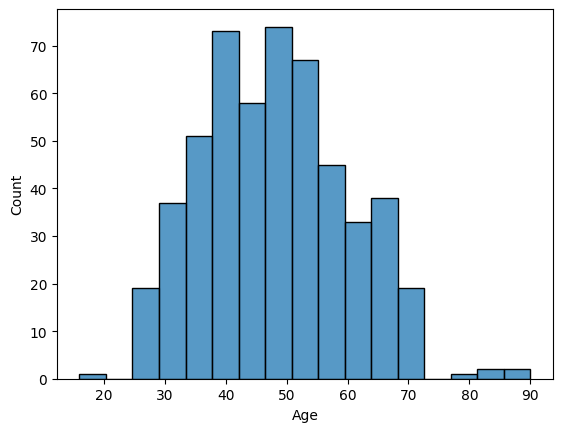

In [90]:
# Display a histogram of the age column in the df.
sns.histplot(df.Age)
plt.show()

<Figure size 800x600 with 0 Axes>

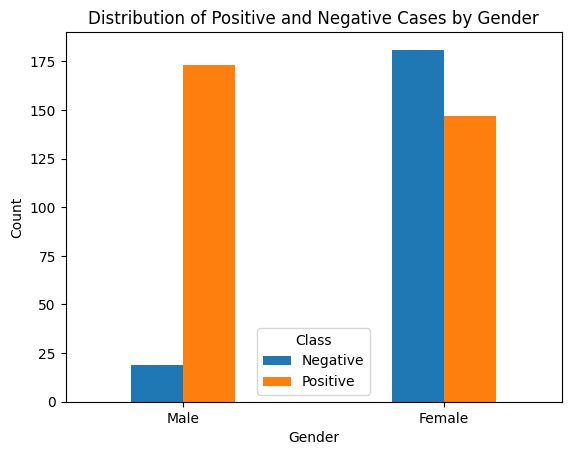

In [91]:
# Plot the grouped bar plot, group the data by Gender to calculate the counts.
gender_counts = df.groupby(['Gender', 'class']).size().unstack()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', width=0.4)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Positive and Negative Cases by Gender")
plt.legend(title="Class", labels=["Negative", "Positive"])
plt.xticks([0, 1], ["Male", "Female"], rotation=0)
plt.show()

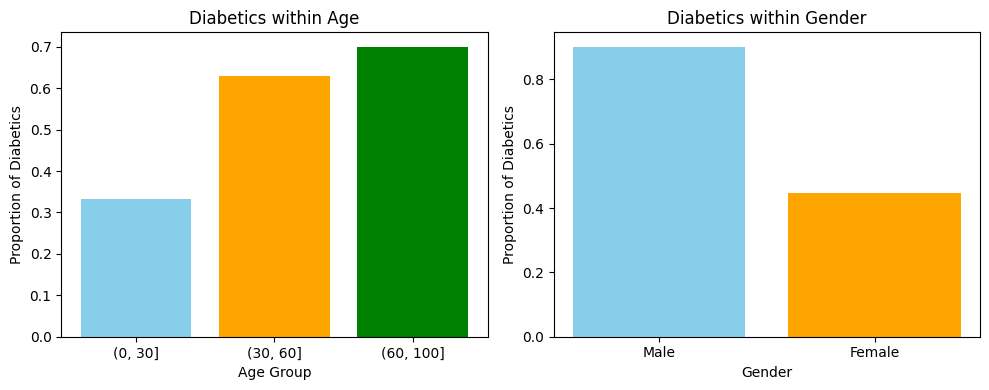

In [92]:
# Define diabetics by age and gender.
gender = {0: "Male", 1: "Female"}
age = df.groupby(pd.cut(df['Age'], bins=[0, 30, 60, 100])).mean()['class']
gender_diabetic = df.groupby('Gender').mean()['class']
color_age = ['skyblue', 'orange', 'green']
color_gender = ['skyblue', 'orange']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(age.index.astype(str), age.values, color=color_age)
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Proportion of Diabetics")
axes[0].set_title("Diabetics within Age")
gender_labels = [gender[gender_value] for gender_value in gender_diabetic.index]
axes[1].bar(gender_labels, gender_diabetic.values, color=color_gender)
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Proportion of Diabetics")
axes[1].set_title("Diabetics within Gender")
plt.tight_layout()
plt.show()

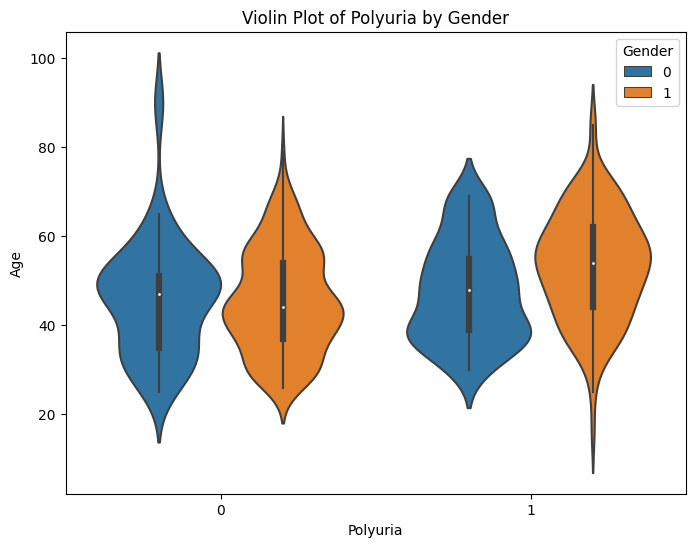

In [93]:
# Plot violin plot of polyuria by gender.
plt.figure(figsize=(8, 6))
sns.violinplot(x='Polyuria', y='Age', hue='Gender', data=df)
plt.xlabel("Polyuria")
plt.ylabel("Age")
plt.title("Violin Plot of Polyuria by Gender")
plt.legend(title="Gender", loc="upper right")
plt.show()

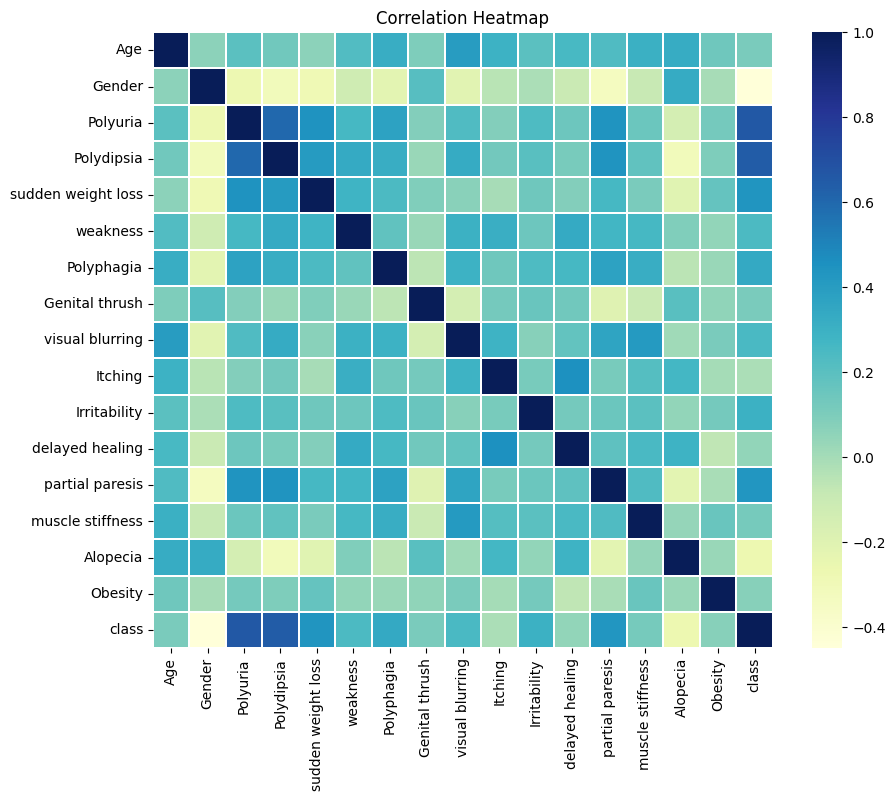

In [94]:
# Analyze the correlation between variables
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, linewidths=0.25, cmap='YlGnBu', annot=False)
plt.title("Correlation Heatmap")
plt.show()


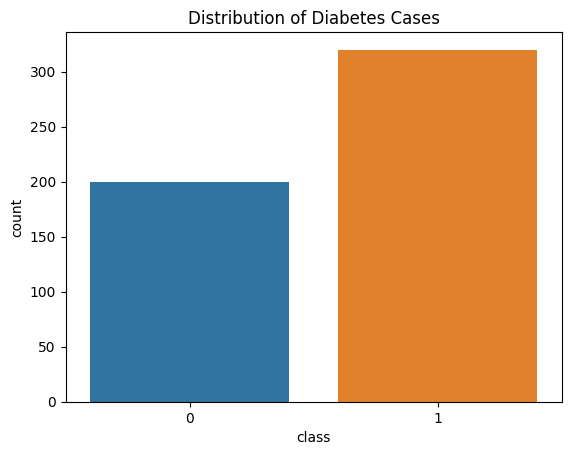

In [95]:
# Check the distribution of the target variable
sns.countplot(x = 'class', data = df)
plt.title('Distribution of Diabetes Cases')
plt.show()

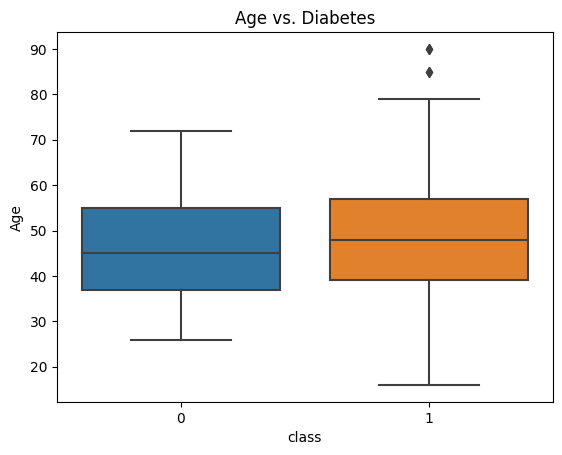

In [96]:
# Boxplot to visualize age vs diabetics.
sns.boxplot(x = 'class', y = 'Age', data = df)
plt.title('Age vs. Diabetes')
plt.show()

In [97]:
# split the dataset into training and testing sets
X = df.drop('class', axis = 1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [98]:
# train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)


Accuracy:  0.9903846153846154
Confusion Matrix: 
[[33  0]
 [ 1 70]]


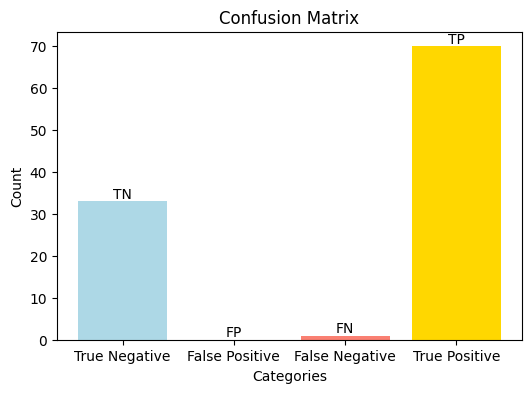

In [99]:
# Calculate accuracy and display confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Confusion Matrix: ")
print(confusion_mat)
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = ['TN', 'FP', 'FN', 'TP']
colors = ['lightblue', 'lightgreen', 'salmon', 'gold']
plt.figure(figsize=(6, 4))
plt.bar(categories, confusion_mat.ravel(), color=colors)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Confusion Matrix')
for i in range(len(categories)):
    plt.text(i, confusion_mat.ravel()[i], labels[i], ha='center', va='bottom')
plt.show()

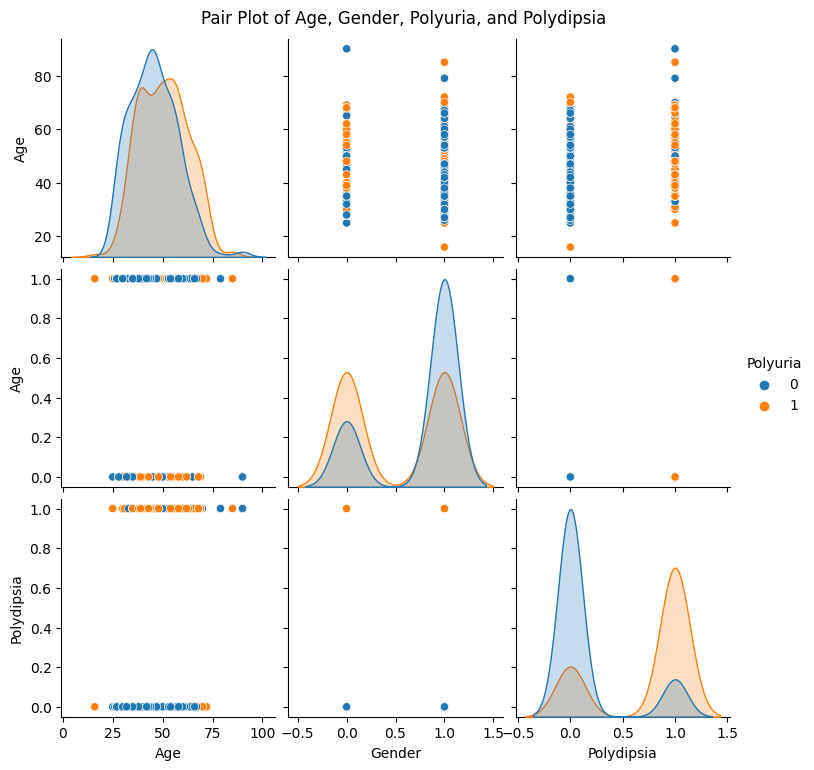

In [100]:
# The pair plot using age, gender, polyuria, and polydipsia to visualize insights into the distributions and potential correlations.
vars = ['Age', 'Gender', 'Polyuria', 'Polydipsia']
df_var = df[vars]
g = sns.pairplot(df_var, hue='Polyuria')
g.axes[0, 0].set_ylabel('Age')
g.axes[1, 0].set_xlabel('Gender')
g.axes[1, 0].set_ylabel('Age')
g.axes[1, 1].set_xlabel('Polyuria')
g.fig.suptitle('Pair Plot of Age, Gender, Polyuria, and Polydipsia', y=1.02)
plt.show()

In [101]:
# calculate the probabilities for positive class predictions
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# calculate the ROC AUC (Receiver Operating Area Under Curve) score
# ROC AUC score is a measure of how well the model distinguishes between positive and negative samples.
# Higher score indicates a better predictive ability.
# AOC of 0.5 suggests no discrimination (ability to diagnose patients with and without the disease or condition tested)
# AOC of 0.7 - 0.8 is considered acceptable, 0.8 - 0.9 is excellent, and more than 0.9 is considered outstanding.
auc_score = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score: ", auc_score)

ROC AUC Score:  1.0


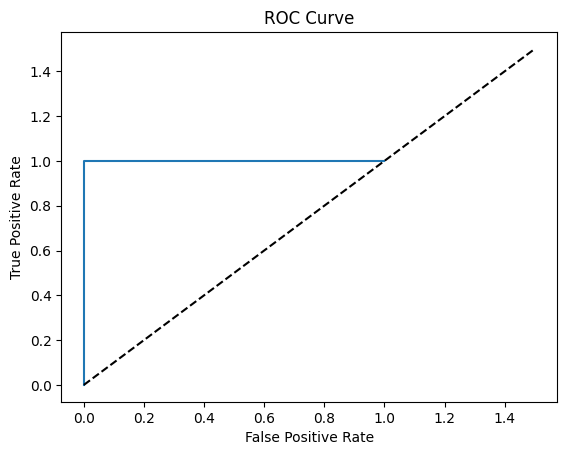

In [102]:
# creat ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0, 1.5], [0, 1.5], 'k--') #random guessing curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

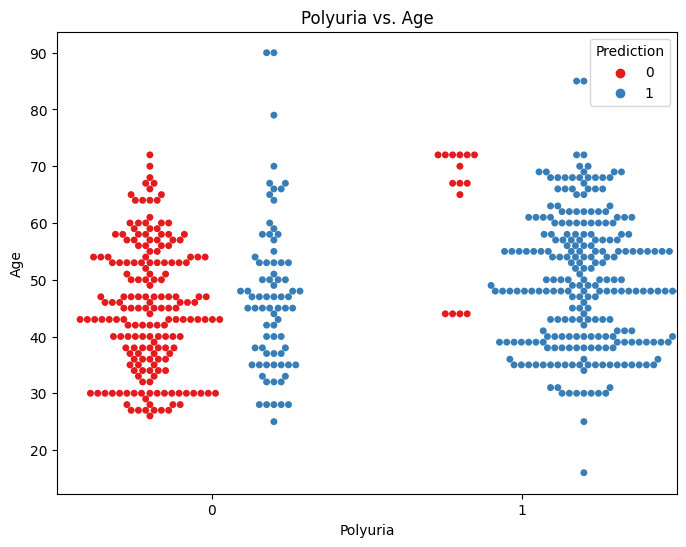

In [103]:
# Swarm plot of Age vs Polyuria.
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Polyuria', y='Age', hue='class', data=df, palette='Set1', dodge=True, size=5)
plt.legend(title="Prediction", loc="upper right")
plt.title("Polyuria vs. Age")
plt.xlabel("Polyuria")
plt.ylabel("Age")
plt.show()



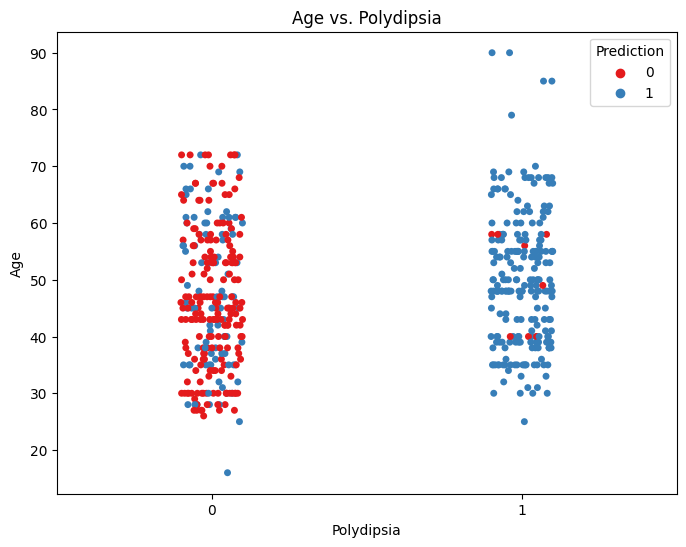

In [104]:
# Strip plot to visualize between age and polydipsia.
plt.figure(figsize=(8, 6))
sns.stripplot(x='Polydipsia', y='Age', data=df, hue='class', palette='Set1', jitter=True, size=5)
plt.title("Age vs. Polydipsia")
plt.xlabel("Polydipsia")
plt.ylabel("Age")
plt.legend(title="Prediction", loc="upper right")
plt.show()

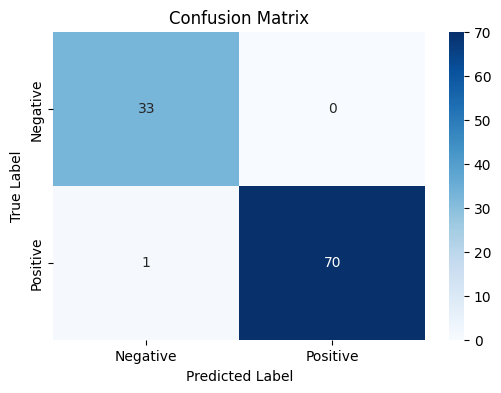

In [105]:
# Visualize heatmap of the confusion matrix with annotations to indicate the present and the absent of the prediction.
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(2) + 0.5, ['Negative', 'Positive'])
plt.yticks(np.arange(2) + 0.5, ['Negative', 'Positive'])
plt.show()



In [106]:
# Create separate sets of data for training the model and evaluating its performance.
predictors = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
X = df[predictors].values
y = (df['class']).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [107]:
# Decision Tree Classification
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=7, random_state=42)
clf.fit(X_train, y_train)

target_names = ['Negative', 'Positive']
dot_data = export_graphviz(clf, precision=2,
                     feature_names=predictors,
                     proportion=True,
                     class_names=target_names,
                     filled=True, rounded=True,
                     special_characters=True)

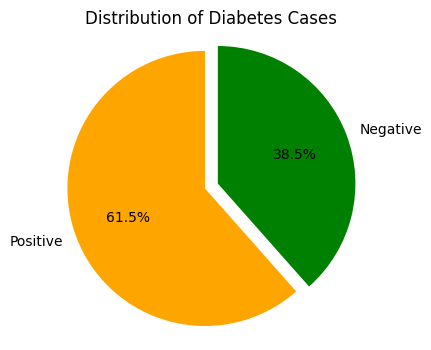

In [108]:
# Calculate the percentage of positive and negative cases
positive_count = df['class'].value_counts()[1]
negative_count = df['class'].value_counts()[0]
total_count = len(df)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
plt.figure(figsize=(4, 4))
labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors = ['orange', 'green']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Diabetes Cases")
plt.axis('equal')
plt.show()

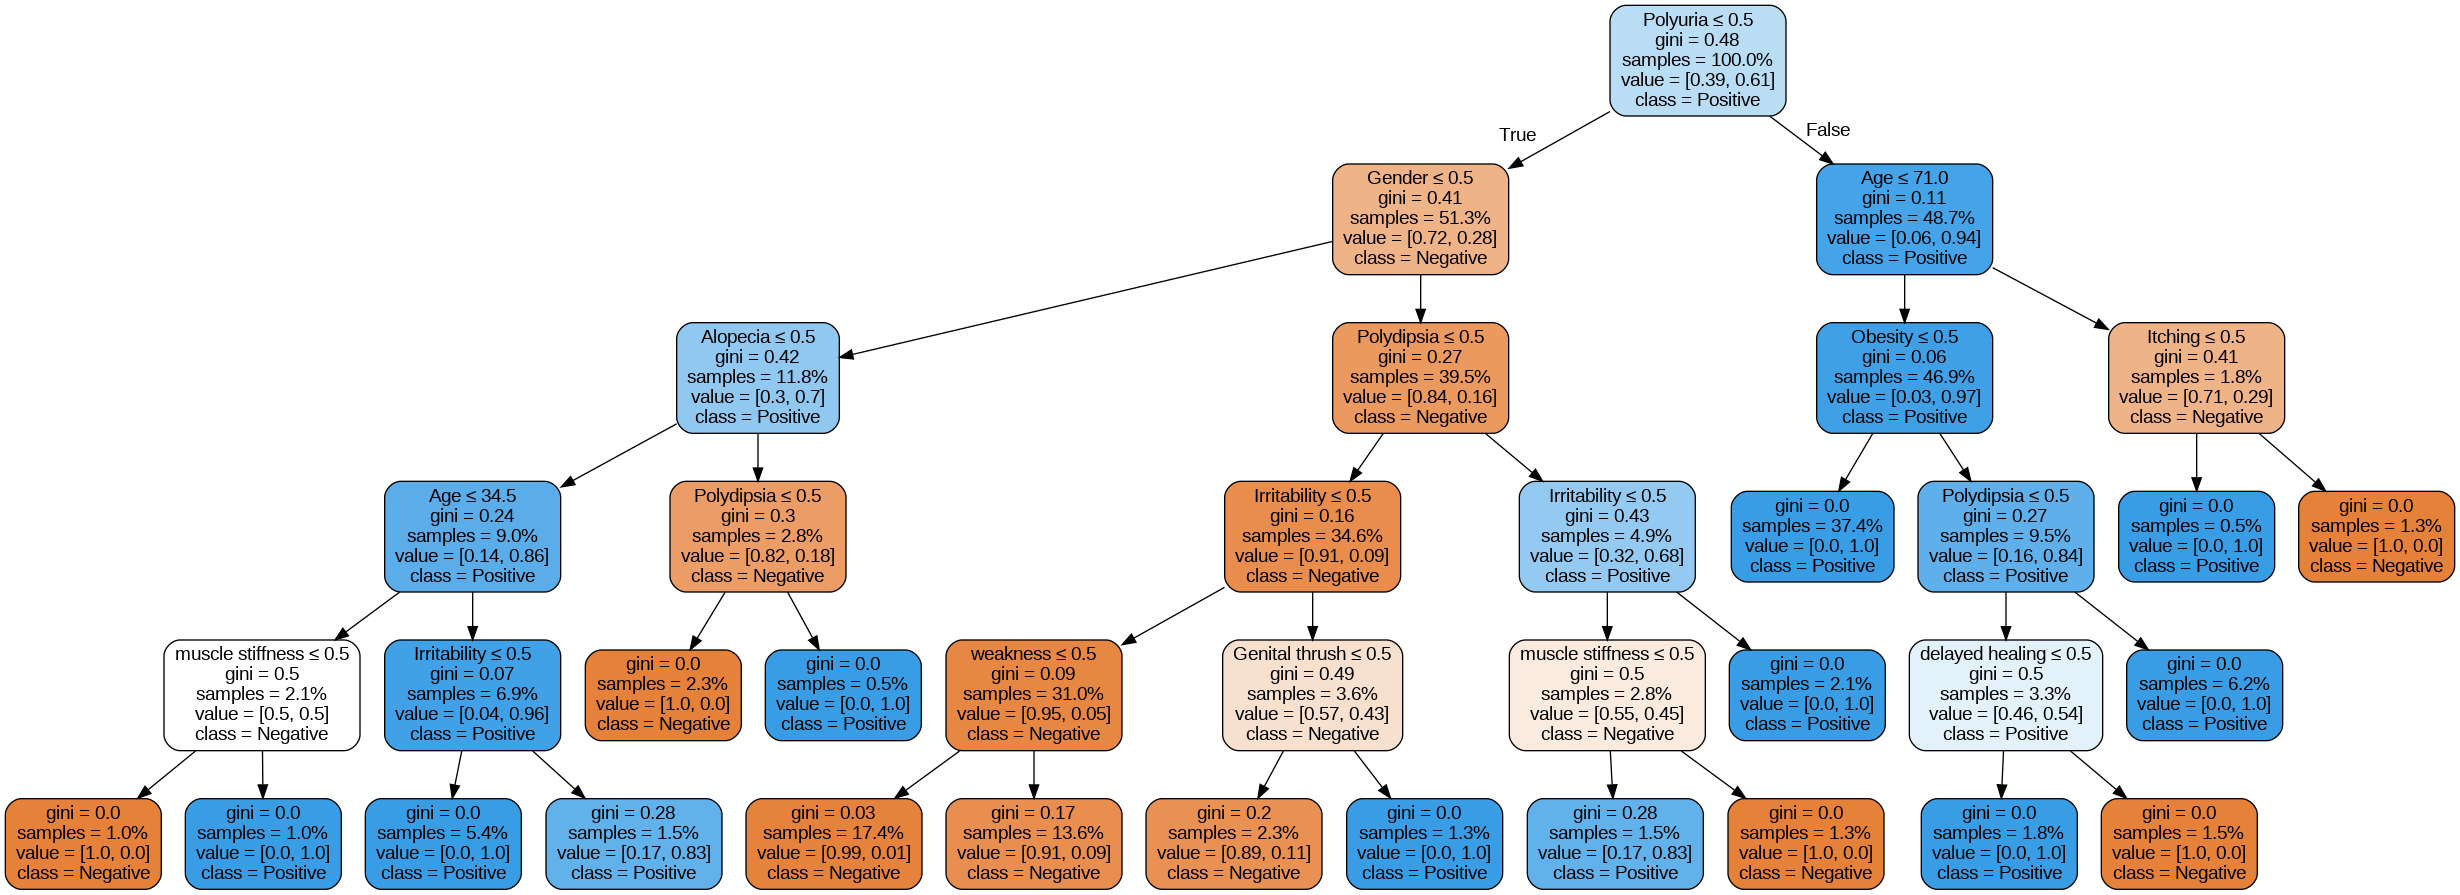

In [109]:
# Graphviz to visualize and render the decision tree graph.
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.filename = 'graph'
graph.render(view=False, format='png', cleanup=True)
Image.open('graph.png').show()